<a href="https://colab.research.google.com/github/930r934/PAYIFY1/blob/master/Copy_of_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
import numpy as np 
import pandas as pd 
import keras 
import tensorflow as tf
from tqdm import tqdm
%matplotlib inline
import cv2
import glob
import os
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

In [3]:
dir = '/content/drive/My Drive/DATASET'

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    print(target_labels)
    return files,targets,target_labels

X,y,target_labels = load_dataset(dir)

['airplane' 'alarm clock' 'angel' 'ant' 'apple' 'arm' 'armchair' 'ashtray'
 'axe' 'backpack' 'banana' 'barn' 'baseball bat' 'basket' 'bathtub'
 'bear (animal)' 'bed' 'bee' 'beer-mug' 'bell' 'bench' 'bicycle'
 'binoculars' 'blimp' 'book' 'bookshelf' 'boomerang' 'bottle opener'
 'bowl' 'brain' 'bread' 'bridge' 'bulldozer' 'bus' 'bush' 'butterfly'
 'cabinet' 'cactus' 'cake' 'calculator' 'camel' 'camera' 'candle' 'cannon'
 'canoe' 'car (sedan)' 'carrot' 'castle' 'cat' 'cell phone' 'chair'
 'chandelier' 'church' 'cigarette' 'cloud' 'comb' 'computer monitor'
 'computer-mouse' 'couch' 'cow' 'crab' 'crane (machine)' 'crocodile'
 'crown' 'cup' 'diamond' 'dog' 'dolphin' 'donut' 'door' 'door handle'
 'dragon' 'duck' 'ear' 'elephant' 'envelope' 'eye' 'eyeglasses' 'face'
 'fan']


In [4]:
classes = len(np.unique(y))
from keras.utils import np_utils
y= np_utils.to_categorical(y,classes)
y[0] 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [5]:
from sklearn.model_selection import train_test_split
X_train,x_val,Y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)

X_train,x_test,Y_train,y_test = train_test_split(X_train,Y_train,test_size=0.2,random_state=42)
X_train.shape,Y_train.shape,x_val.shape,y_val.shape,x_test.shape,y_test.shape

print(len(X_train))
print(len(x_val))
print(len(x_test))

4096
1280
1024


In [6]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img
import numpy as np
import cv2
default_image_size=tuple((150,150))
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
         # Convert to Numpy Array
        image=cv2.imread(file)
        if image is not None :
          image=cv2.resize(image, default_image_size) 
          images_as_array.append(img_to_array(image))
    return images_as_array

X_train = np.array(convert_image_to_array(X_train))
print('Size of Training set: ',X_train.shape)

x_val = np.array(convert_image_to_array(x_val))
print('Size of Validation set: ',x_val.shape)

x_test = np.array(convert_image_to_array(x_test))
print('Size of Test set: ',x_test.shape)

Size of Training set:  (4096, 150, 150, 3)
Size of Validation set:  (1280, 150, 150, 3)
Size of Test set:  (1024, 150, 150, 3)


In [7]:
X_train = X_train.astype('float32')/255
x_val = x_val.astype('float32')/255
x_test = x_test.astype('float32')/255
X_train[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

In [8]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.models import Sequential
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
imagegen = ImageDataGenerator(featurewise_center=False,
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                            rotation_range=60,
                              zoom_range=0.1,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              fill_mode='reflect')
imagegen.fit(X_train)

In [9]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model, layers

VGG_model = VGG16(input_shape = (150, 150, 3),pooling='avg',include_top=False, weights="imagenet")
#for layer in pre_trained_model.layers:
 # layer.trainable = False
VGG_model.summary()

#last_layer = pre_trained_model.get_layer('mixed7')
#print('last layer output shape: ', last_layer.output_shape)
#last_output = last_layer.output

from keras import Model
layer_name = 'block5_pool'
my_model = Model(inputs=VGG_model.input,outputs=VGG_model.get_layer(layer_name).output)
my_model.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [10]:
from keras import models         
model = models.Sequential()
model.add(my_model)
from keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(GlobalAveragePooling2D())
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(80,activation='softmax'))
model.layers[5].trainable = False

#model = Model( pre_trained_model.input, x) 
#model.summary()

In [11]:

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])
print('Compilation Done')

Compilation Done


In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
batch_size = 32

checkpoint = ModelCheckpoint(filepath = 'cnn3.hdf5',monitor='val_accuracy' ,verbose = 1, save_best_only = True)
reduce_lr=ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,mode='auto')
model_dropout = model.fit_generator(imagegen.flow(X_train,Y_train, batch_size=32),epochs=60,callbacks=[checkpoint,reduce_lr],verbose=2,
                          validation_data=imagegen.flow(x_val, y_val,batch_size=32),shuffle=True,steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/60

Epoch 00001: val_accuracy improved from -inf to 0.07422, saving model to cnn3.hdf5
128/128 - 36s - loss: 3.7463 - accuracy: 0.0972 - val_loss: 3.8272 - val_accuracy: 0.0742
Epoch 2/60

Epoch 00002: val_accuracy did not improve from 0.07422
128/128 - 35s - loss: 3.7432 - accuracy: 0.0986 - val_loss: 3.8617 - val_accuracy: 0.0734
Epoch 3/60

Epoch 00003: val_accuracy improved from 0.07422 to 0.07891, saving model to cnn3.hdf5
128/128 - 36s - loss: 3.7430 - accuracy: 0.0989 - val_loss: 3.8030 - val_accuracy: 0.0789
Epoch 4/60

Epoch 00004: val_accuracy improved from 0.07891 to 0.08438, saving model to cnn3.hdf5
128/128 - 36s - loss: 3.7502 - accuracy: 0.0994 - val_loss: 3.8386 - val_accuracy: 0.0844
Epoch 5/60

Epoch 00005: val_accuracy did not improve from 0.08438
128/128 - 35s - loss: 3.7382 - accuracy: 0.0962 - val_loss: 3.7918 - val_accuracy: 0.0828
Epoch 6/60

Epoch 00006: val_accuracy did not improve from 0.08438
128/128 - 35s - loss: 3.7419 - accuracy: 0.0950 - val_loss

In [13]:
model.load_weights('cnn3.hdf5')

In [14]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test,batch_size=32,verbose=0)
print('\n', 'Test Loss','Test accuracy:', score[0],score[1])
#accuracy !!


 Test Loss Test accuracy: 4.201958656311035 0.048828125


In [15]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1).astype(int)

y_true = np.argmax(y_test,axis = 1).astype(int)
corr=[]
incorr=[]
corr_count=0
incorr_count=0

for i in range(len(y_test)):
   # checking for correct predictions
    if(y_pred[i]==y_true[i]):
        corr.append(i)
        corr_count+=1
    else:
        incorr.append(i)
        incorr_count+=1
        
print("%d Images are identified correctly" %(corr_count))
print("%d Images are identified incorrectly" %(incorr_count))

50 Images are identified correctly
974 Images are identified incorrectly


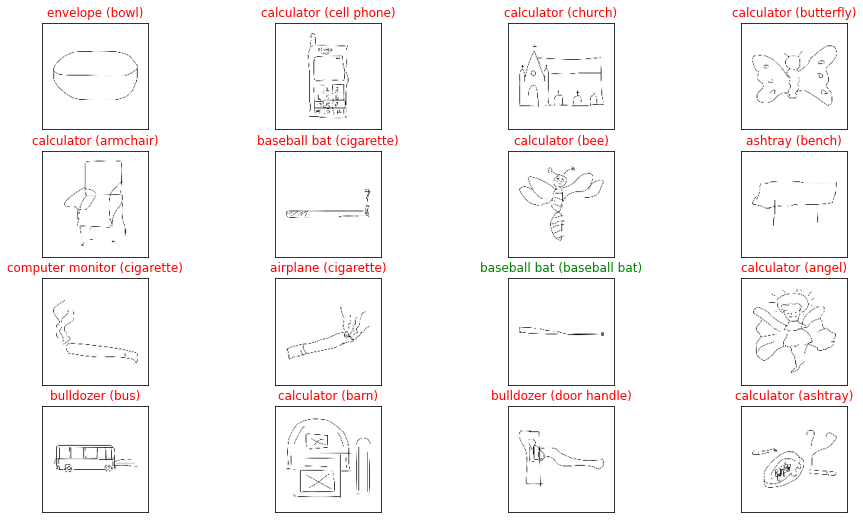

In [16]:
# Let's visualize test prediction.

y_pred = model.predict(x_test)

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

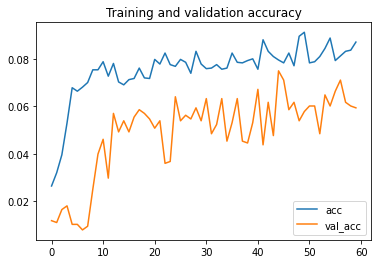

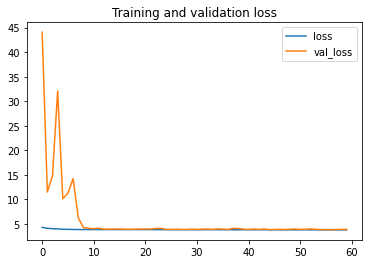

In [17]:
import matplotlib.pyplot as plt
acc = model_dropout.history['accuracy']
val_acc = model_dropout.history['val_accuracy']
loss = model_dropout.history['loss']
val_loss = model_dropout.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.legend(['acc', 'val_acc'], loc='lower right')  
plt.title('Training and validation accuracy')


plt.figure()
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.legend(['loss', 'val_loss'], loc='upper right')  
plt.title('Training and validation loss')

plt.show()